Após ter realizado análises univariadas e bivariadas, definido e validado algumas hipóteses a respeito dos dados, separado as veriáveis em

In [1]:
import pandas as pd
import numpy as np
from utils import *
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, KFold, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.feature_selection import SelectKBest, f_regression

import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', None)


In [2]:
# carregando os dados
data_root = pd.read_csv('/home/usuario/Pessoal/alura_challenge_ds/dados/data_cleaned.csv', index_col = [0])

# shape
print(f'Formato do arquivo: {data_root.shape[0]} linhas e {data_root.shape[1]} colunas')

# checking dataset
data_root.head()

FileNotFoundError: [Errno 2] No such file or directory: '/home/usuario/Pessoal/alura_challenge_ds/dados/data_cleaned.csv'

In [ ]:
data = data_root.copy()

In [ ]:
from dython import nominal

# nominal.associations(data.iloc[:, 1:], figsize = (25, 15), mark_columns = True);

In [ ]:
# columns analysis
columns_descriptions = []

for column in data.columns:
    column_description = column_analysis(data, column)
    columns_descriptions.append(column_description)

pd.DataFrame(columns_descriptions, columns = ['nome', 'cardinalidade', 'dados_unicos', 'dados_nulos', 'tipo'])

,nome,cardinalidade,dados_unicos,dados_nulos,tipo
0,id,7043,['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9...,0,object
1,churn,2,['No' 'Yes'],0,object
2,genero,2,['Female' 'Male'],0,object
3,idoso,2,['No' 'Yes'],0,object
4,parceiro,2,['Yes' 'No'],0,object
5,dependente,2,['Yes' 'No'],0,object
6,permanencia,73,[ 9 4 13 3 71 63 7 65 54 72 5 56 34 1 45 ...,0,int64
7,servico_telefonico,2,['Yes' 'No'],0,object
8,multiplas_linhas,3,['No' 'Yes' 'No phone service'],0,object
9,servico_internet,3,['DSL' 'Fiber optic' 'No'],0,object


In [ ]:
servico_internet_dummies = pd.get_dummies(data.servico_internet, prefix = 'servico_internet', prefix_sep = '_', drop_first = True) #, drop_first = True
contrato_dummies = pd.get_dummies(data.contrato, prefix = 'contrato', prefix_sep = '_', drop_first = True)
metodo_pagamento_dummies = pd.get_dummies(data.metodo_pagamento, prefix = 'metodo_pagamento', prefix_sep = '_', drop_first = True)

In [ ]:
data.drop(['servico_internet', 'contrato', 'metodo_pagamento'], axis = 1, inplace = True)

data.head()

,id,churn,genero,idoso,parceiro,dependente,permanencia,servico_telefonico,multiplas_linhas,seguranca_online,backup_online,protecao_dispositivo,suporte_tecnico,tv_streaming,filme_streaming,conta_papel,mensal,total
0,0002-ORFBO,No,Female,No,Yes,Yes,9,Yes,No,No,Yes,No,Yes,Yes,No,Yes,65.6,593.30
1,0003-MKNFE,No,Male,No,No,No,9,Yes,Yes,No,No,No,No,No,Yes,No,59.9,542.40
2,0004-TLHLJ,Yes,Male,No,No,No,4,Yes,No,No,No,Yes,No,No,No,Yes,73.9,280.85
3,0011-IGKFF,Yes,Male,Yes,Yes,No,13,Yes,No,No,Yes,Yes,No,Yes,Yes,Yes,98.0,1237.85
4,0013-EXCHZ,Yes,Female,Yes,Yes,No,3,Yes,No,No,No,No,Yes,Yes,No,Yes,83.9,267.40


In [ ]:
data_complete = pd.concat([data, servico_internet_dummies, contrato_dummies, metodo_pagamento_dummies], axis = 1)

data_complete.head()

,id,churn,genero,idoso,parceiro,dependente,permanencia,servico_telefonico,multiplas_linhas,seguranca_online,backup_online,protecao_dispositivo,suporte_tecnico,tv_streaming,filme_streaming,conta_papel,mensal,total,servico_internet_Fiber optic,servico_internet_No,contrato_One year,contrato_Two year,metodo_pagamento_Credit card (automatic),metodo_pagamento_Electronic check,metodo_pagamento_Mailed check
0,0002-ORFBO,No,Female,No,Yes,Yes,9,Yes,No,No,Yes,No,Yes,Yes,No,Yes,65.6,593.30,0,0,1,0,0,0,1
1,0003-MKNFE,No,Male,No,No,No,9,Yes,Yes,No,No,No,No,No,Yes,No,59.9,542.40,0,0,0,0,0,0,1
2,0004-TLHLJ,Yes,Male,No,No,No,4,Yes,No,No,No,Yes,No,No,No,Yes,73.9,280.85,1,0,0,0,0,1,0
3,0011-IGKFF,Yes,Male,Yes,Yes,No,13,Yes,No,No,Yes,Yes,No,Yes,Yes,Yes,98.0,1237.85,1,0,0,0,0,1,0
4,0013-EXCHZ,Yes,Female,Yes,Yes,No,3,Yes,No,No,No,No,Yes,Yes,No,Yes,83.9,267.40,1,0,0,0,0,0,1


In [ ]:
data_complete.replace({
    'No phone service': 0,
    'No internet service': 0,
    'No': 0,
    'Yes': 1,
    'Male': 0,
    'Female': 1
}, inplace = True)

In [ ]:
data_complete

,id,churn,genero,idoso,parceiro,dependente,permanencia,servico_telefonico,multiplas_linhas,seguranca_online,backup_online,protecao_dispositivo,suporte_tecnico,tv_streaming,filme_streaming,conta_papel,mensal,total,servico_internet_Fiber optic,servico_internet_No,contrato_One year,contrato_Two year,metodo_pagamento_Credit card (automatic),metodo_pagamento_Electronic check,metodo_pagamento_Mailed check
0,0002-ORFBO,0,1,0,1,1,9,1,0,0,1,0,1,1,0,1,65.60,593.30,0,0,1,0,0,0,1
1,0003-MKNFE,0,0,0,0,0,9,1,1,0,0,0,0,0,1,0,59.90,542.40,0,0,0,0,0,0,1
2,0004-TLHLJ,1,0,0,0,0,4,1,0,0,0,1,0,0,0,1,73.90,280.85,1,0,0,0,0,1,0
3,0011-IGKFF,1,0,1,1,0,13,1,0,0,1,1,0,1,1,1,98.00,1237.85,1,0,0,0,0,1,0
4,0013-EXCHZ,1,1,1,1,0,3,1,0,0,0,0,1,1,0,1,83.90,267.40,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,0,1,0,0,0,13,1,0,1,0,0,1,0,0,0,55.15,742.90,0,0,1,0,0,0,1
7263,9992-RRAMN,1,0,0,1,0,22,1,1,0,0,0,0,0,1,1,85.10,1873.70,1,0,0,0,0,1,0
7264,9992-UJOEL,0,0,0,0,0,2,1,0,0,1,0,0,0,0,1,50.30,92.75,0,0,0,0,0,0,1
7265,9993-LHIEB,0,0,0,1,1,67,1,0,1,0,1,1,0,1,0,67.85,4627.65,0,0,0,1,0,0,1


In [ ]:
### teste

Imported version = 0.1.87.
from featurewiz import FeatureWiz
wiz = FeatureWiz(verbose=1)
X_train_selected = wiz.fit_transform(X_train, y_train)
X_test_selected = wiz.transform(X_test)
wiz.features  ### provides a list of selected features ###
                                
############################################################################################
############       F A S T   F E A T U R E  E N G G    A N D    S E L E C T I O N ! ########
# Be judicious with featurewiz. Don't use it to create too many un-interpretable features! #
############################################################################################
Skipping feature engineering since no feature_engg input...
Skipping category encoding since no category encoders specified in input...
**INFO: featurewiz can now read feather formatted files. Loading train data...
    Shape of your Data Set loaded: (7043, 25)
    Loaded train data. Shape = (7043, 25)
    Some column names had special characters whic

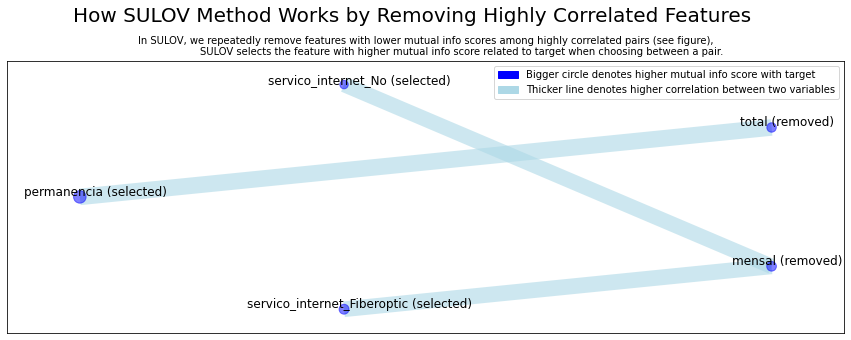

Time taken for SULOV method = 1 seconds
    Adding 0 categorical variables to reduced numeric variables  of 21
Final list of selected vars after SULOV = 21
Readying dataset for Recursive XGBoost by converting all features to numeric...
#######################################################################################
#####    R E C U R S I V E   X G B O O S T : F E A T U R E   S E L E C T I O N  #######
#######################################################################################
    using regular XGBoost
Train and Test loaded into Dask dataframes successfully after feature_engg completed
Current number of predictors = 21 
    XGBoost version: 1.6.1
Number of booster rounds = 100
        using 21 variables...
            Time taken for regular XGBoost feature selection = 20 seconds
        using 17 variables...
            Time taken for regular XGBoost feature selection = 27 seconds
        using 13 variables...
            Time taken for regular XGBoost feature selecti

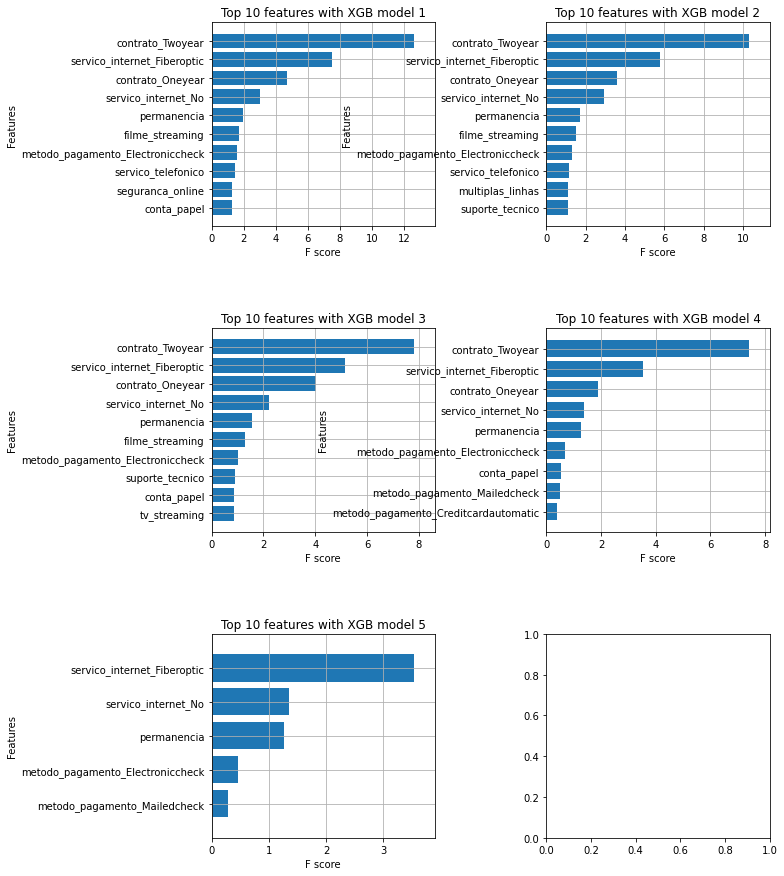

            Total time taken for XGBoost feature selection = 63 seconds
    Alert: No ID variables ['id'] are included in selected features
#######################################################################################
#####          F E A T U R E   S E L E C T I O N   C O M P L E T E D            #######
#######################################################################################
Selected 15 important features:
['contrato_Twoyear', 'servico_internet_Fiberoptic', 'contrato_Oneyear', 'servico_internet_No', 'permanencia', 'filme_streaming', 'metodo_pagamento_Electroniccheck', 'servico_telefonico', 'seguranca_online', 'conta_papel', 'multiplas_linhas', 'suporte_tecnico', 'tv_streaming', 'metodo_pagamento_Mailedcheck', 'metodo_pagamento_Creditcardautomatic']

    Time taken for feature selection = 64 seconds
Returning 2 dataframes: dataname and test_data with 15 important features.


In [ ]:
from featurewiz import featurewiz

target = 'churn'

features, train = featurewiz(
    data_complete,
    target,
    corr_limit = 0.7,
    verbose = 2,
    sep = ',',
    header = 0,
    test_data = '',
    feature_engg = '',
    category_encoders = ''
)


In [ ]:
X, y = train.drop(['churn'], axis = 1), train.churn.values

In [ ]:
train

,contrato_Two year,servico_internet_Fiber optic,contrato_One year,servico_internet_No,permanencia,filme_streaming,metodo_pagamento_Electronic check,servico_telefonico,seguranca_online,conta_papel,multiplas_linhas,suporte_tecnico,tv_streaming,metodo_pagamento_Mailed check,metodo_pagamento_Credit card (automatic),churn
0,0,0,1,0,9,0,0,1,0,1,0,1,1,1,0,0
1,0,0,0,0,9,1,0,1,0,0,1,0,0,1,0,0
2,0,1,0,0,4,0,1,1,0,1,0,0,0,0,0,1
3,0,1,0,0,13,1,1,1,0,1,0,0,1,0,0,1
4,0,1,0,0,3,0,0,1,0,1,0,1,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,0,0,1,0,13,0,0,1,1,0,0,1,0,1,0,0
7263,0,1,0,0,22,1,1,1,0,1,1,0,0,0,0,1
7264,0,0,0,0,2,0,0,1,0,1,0,0,0,1,0,0
7265,1,0,0,0,67,1,0,1,1,0,0,1,0,1,0,0


In [ ]:
features

['contrato_Two year',
 'servico_internet_Fiber optic',
 'contrato_One year',
 'servico_internet_No',
 'permanencia',
 'filme_streaming',
 'metodo_pagamento_Electronic check',
 'servico_telefonico',
 'seguranca_online',
 'conta_papel',
 'multiplas_linhas',
 'suporte_tecnico',
 'tv_streaming',
 'metodo_pagamento_Mailed check',
 'metodo_pagamento_Credit card (automatic)']

In [ ]:
# nominal.associations(data_complete[['churn'] + features], figsize = (25, 15), mark_columns = True);

In [ ]:
# nominal.associations(data_complete.iloc[:, 1:], figsize = (25, 15), mark_columns = True);

In [ ]:
from sklearn.metrics import classification_report, f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import cross_validate, cross_val_predict, cross_val_score
# from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from imblearn.pipeline import make_pipeline, Pipeline


In [ ]:
# X2, y2 = data_complete.iloc[:, 2:], data_complete['churn']
# # columns_stepwise = stepwise_regression(X, y, threshold_in = 0.01, threshold_out = 0.05, verbose = False)
# columns_stepwise = stepwise_regression_1(X2, y2, threshold_in = 0.01, threshold_out = 0.05, verbose = False)

# # X = X[columns_stepwise]
# columns_stepwise


In [ ]:
seed = 42

In [ ]:
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler, TomekLinks, NearMiss
from xgboost import XGBClassifier


In [ ]:
models = {
    'Dummy Classifier': DummyClassifier(random_state = seed),
    'Logistic Regression': LogisticRegression(random_state = seed), 
    'Random Forest Classifier': RandomForestClassifier(random_state = seed),
    'Decision Tree Classifier': DecisionTreeClassifier(random_state = seed),
    'Gradient Boosting Classifier': GradientBoostingClassifier(random_state = seed),
    'Support Vector Classifier': SVC(random_state = seed)
}

balances = {
    'Random Under Sampling': RandomUnderSampler(replacement = True, random_state = seed),
    'Tomek Links': TomekLinks(sampling_strategy = 'majority'),
    'Near Miss': NearMiss(),
    'Random Over Sampling': RandomOverSampler(random_state = seed),
    'SMOTE': SMOTE(random_state = seed)
}

In [ ]:
accuracy = []
f1 = []
precision = []
recall = []
model_names = []
balance_names = []
roc_auc = []

for balance_name, balance in balances.items():
    for model_name, model in models.items():

        balance = balance
        scale = MinMaxScaler()
        model = model
        
        pipeline = Pipeline([
            ('balanceamento', balance),
            ('normalizacao', scale),
            ('modelo', model)
        ])
        
        cv = StratifiedKFold(n_splits = 10, shuffle = True, random_state = seed)
        resultado = cross_validate(pipeline, X, y, cv = cv, scoring = ['accuracy', 'f1', 'precision', 'recall', 'roc_auc'])

        accuracy.append(resultado['test_accuracy'].mean().round(2))
        f1.append(resultado['test_f1'].mean().round(2))
        precision.append(resultado['test_precision'].mean().round(2))
        recall.append(resultado['test_recall'].mean().round(2))
        roc_auc.append(resultado['test_roc_auc'].mean().round(2))

        balance_names.append(balance_name)
        model_names.append(model_name)

models_report = pd.DataFrame({
    'model': model_names,
    'balance': balance_names,
    'accuracy': accuracy,
    'f1': f1,
    'precision': precision,
    'recall': recall,
    'roc_auc': roc_auc
})

In [26]:
models_report.sort_values('recall', ascending = False)

,model,balance,accuracy,f1,precision,recall,roc_auc
4,Gradient Boosting Classifier,Random Under Sampling,0.74,0.63,0.51,0.82,0.85
5,Support Vector Classifier,Random Under Sampling,0.73,0.61,0.50,0.80,0.83
22,Gradient Boosting Classifier,Random Over Sampling,0.75,0.62,0.51,0.80,0.85
19,Logistic Regression,Random Over Sampling,0.75,0.62,0.52,0.79,0.84
1,Logistic Regression,Random Under Sampling,0.75,0.62,0.52,0.79,0.84
25,Logistic Regression,SMOTE,0.75,0.62,0.52,0.77,0.84
28,Gradient Boosting Classifier,SMOTE,0.75,0.62,0.52,0.77,0.84
23,Support Vector Classifier,Random Over Sampling,0.73,0.61,0.50,0.77,0.82
2,Random Forest Classifier,Random Under Sampling,0.71,0.58,0.48,0.75,0.80
29,Support Vector Classifier,SMOTE,0.75,0.61,0.52,0.73,0.81


In [27]:
# x_train, x_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state = seed)

In [28]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [29]:
# Parametros de otimização
parameters = {
    'modelo__n_estimators': [100, 125, 150, 200],
    'modelo__max_depth': [3, 4, 5, 6],
    'modelo__min_samples_split': [2, 3, 4, 5],
    'modelo__learning_rate': [0.1, 0.5, 1]
}

# Gradient Boosting Otimização
balance = RandomUnderSampler(replacement = True, random_state = seed)
scale = MinMaxScaler()
model = GradientBoostingClassifier(random_state = seed)
pipeline = Pipeline([
    ('balanceamento', balance),
    ('normalizacao', scale),
    ('modelo', model)
])

cv = StratifiedKFold(n_splits = 10, shuffle = True)

gsc = GridSearchCV(pipeline, parameters, cv = cv, scoring = 'recall', n_jobs = -1)

gsc.fit(X, y)

# Melhores parametros
best_params = {
    'max_depth': gsc.best_params_['modelo__max_depth'],
    'min_samples_split': gsc.best_params_['modelo__min_samples_split'],
    'n_estimators': gsc.best_params_['modelo__n_estimators'],
    'learning_rate': gsc.best_params_['modelo__learning_rate']
}

# Modelo otimziado
balance = RandomUnderSampler(replacement = True, random_state = seed)
scale = MinMaxScaler()
model = GradientBoostingClassifier(**best_params, random_state = seed)
pipeline = Pipeline([
    ('balanceamento', balance),
    ('normalizacao', scale),
    ('modelo', model)
])

cv = StratifiedKFold(n_splits = 10, shuffle = True)

resultado = cross_validate(pipeline, X, y, cv = cv, scoring = ['accuracy', 'f1', 'precision', 'recall', 'roc_auc'], n_jobs = -1)

models_report = pd.DataFrame({
    'model': 'Gradient Boosting Classifier',
    'accuracy': resultado['test_accuracy'].mean().round(2),
    'f1': resultado['test_f1'].mean().round(2),
    'precision': resultado['test_precision'].mean().round(2),
    'recall': resultado['test_recall'].mean().round(2),
    'roc_auc': resultado['test_roc_auc'].mean().round(2)
}, index = [0])

#
models_report

,model,accuracy,f1,precision,recall,roc_auc
0,Gradient Boosting Classifier,0.74,0.62,0.51,0.8,0.84


Embora  o modelo Gradient Boosting Classifier tenha o melhor desempenho de todos os modelos, irei fazer também a otimização do modelo Logistic Regression, pois dado o problema de classificação que temos, churn de clientes, faz mais sentido para nós respondermos o que cada variável impacta para o churn do que uma melhora substancial da métrica de classificação.

In [30]:
# Parametros de otimização
parameters = {
    'modelo__C': np.logspace(-4, 4, 50),
    'modelo__penalty': ['l1', 'l2']
}


# Logistic Regression Otimização
balance = RandomOverSampler(random_state = seed)
scale = MinMaxScaler()
model = LogisticRegression(random_state = seed)
pipeline = Pipeline([
    ('balanceamento', balance),
    ('normalizacao', scale),
    ('modelo', model)
])

cv = StratifiedKFold(n_splits = 10, shuffle = True)

gsc = GridSearchCV(pipeline, parameters, cv = cv, scoring = 'recall', n_jobs = -1)

gsc.fit(X, y)

# Melhores parametros
best_params = {
    'C': gsc.best_params_['modelo__C'],
    'penalty': gsc.best_params_['modelo__penalty']
}

# Modelo otimizado
balance = RandomOverSampler(random_state = seed)
scale = MinMaxScaler()
model = LogisticRegression(**best_params, random_state = seed)
pipeline = Pipeline([
    ('balanceamento', balance),
    ('normalizacao', scale),
    ('modelo', model)
])

cv = StratifiedKFold(n_splits = 10, shuffle = True)

resultado = cross_validate(pipeline, X, y, cv = cv, scoring = ['accuracy', 'f1', 'precision', 'recall', 'roc_auc'], n_jobs = -1)

models_report = pd.DataFrame({
    'model': 'Logistic Regression',
    'accuracy': resultado['test_accuracy'].mean().round(2),
    'f1': resultado['test_f1'].mean().round(2),
    'precision': resultado['test_precision'].mean().round(2),
    'recall': resultado['test_recall'].mean().round(2),
    'roc_auc': resultado['test_roc_auc'].mean().round(2)
}, index = [0])

#
models_report

,model,accuracy,f1,precision,recall,roc_auc
0,Logistic Regression,0.75,0.63,0.52,0.8,0.84


In [31]:
import statsmodels.api as sm

logit_model = sm.Logit(y, X)
result = logit_model.fit()

print(result.summary())

Optimization terminated successfully.
         Current function value: 0.416723
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                 7043
Model:                          Logit   Df Residuals:                     7028
Method:                           MLE   Df Model:                           14
Date:                Fri, 08 Jul 2022   Pseudo R-squ.:                  0.2798
Time:                        11:49:52   Log-Likelihood:                -2935.0
converged:                       True   LL-Null:                       -4075.1
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
contrato_Two year                           -1.4

In [34]:
# Parametros de otimização
parameters = {
    'modelo__C': np.logspace(-4, 4, 50),
    'modelo__penalty': ['l1', 'l2']
}


# Logistic Regression Otimização
balance = RandomOverSampler(random_state = seed)
scale = MinMaxScaler()
model = LogisticRegression(random_state = seed)
pipeline = Pipeline([
    ('balanceamento', balance),
    ('normalizacao', scale),
    ('modelo', model)
])

cv = StratifiedKFold(n_splits = 10, shuffle = True)

gsc = GridSearchCV(pipeline, parameters, cv = cv, scoring = 'recall', n_jobs = -1)

gsc.fit(X.drop(['metodo_pagamento_Credit card (automatic)', 'metodo_pagamento_Mailed check'], axis = 1), y)

# Melhores parametros
best_params = {
    'C': gsc.best_params_['modelo__C'],
    'penalty': gsc.best_params_['modelo__penalty']
}

# Modelo otimizado
balance = RandomOverSampler(random_state = seed)
scale = MinMaxScaler()
model = LogisticRegression(**best_params, random_state = seed)
pipeline = Pipeline([
    ('balanceamento', balance),
    ('normalizacao', scale),
    ('modelo', model)
])

cv = StratifiedKFold(n_splits = 10, shuffle = True)

resultado = cross_validate(pipeline, X.drop(['metodo_pagamento_Credit card (automatic)', 'metodo_pagamento_Mailed check'], axis = 1), y, cv = cv, scoring = ['accuracy', 'f1', 'precision', 'recall', 'roc_auc'], n_jobs = -1)

models_report = pd.DataFrame({
    'model': 'Logistic Regression',
    'accuracy': resultado['test_accuracy'].mean().round(2),
    'f1': resultado['test_f1'].mean().round(2),
    'precision': resultado['test_precision'].mean().round(2),
    'recall': resultado['test_recall'].mean().round(2),
    'roc_auc': resultado['test_roc_auc'].mean().round(2)
}, index = [0])

#
models_report

,model,accuracy,f1,precision,recall,roc_auc
0,Logistic Regression,0.75,0.63,0.52,0.8,0.84


In [38]:
import statsmodels.api as sm

logit_model = sm.Logit(y, X.drop(['metodo_pagamento_Credit card (automatic)', 'metodo_pagamento_Mailed check'], axis = 1))
result = logit_model.fit()

print(result.summary())

Optimization terminated successfully.
         Current function value: 0.416915
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                 7043
Model:                          Logit   Df Residuals:                     7030
Method:                           MLE   Df Model:                           12
Date:                Fri, 08 Jul 2022   Pseudo R-squ.:                  0.2794
Time:                        14:40:37   Log-Likelihood:                -2936.3
converged:                       True   LL-Null:                       -4075.1
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
contrato_Two year                    -1.3994      0.172     -8

In [33]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc, roc_auc_score
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report
from scikitplot.metrics import plot_roc
from scikitplot.metrics import plot_precision_recall
from scikitplot.metrics import plot_cumulative_gain
from scikitplot.metrics import plot_lift_curve
from numpy import argmax
import numpy as np

def build_and_test(x_train, x_test, y_train, y_test, class_weight = None, threshold = False):
    
    # Build and Plot PCA
    pca = PCA(n_components = 2)
    pca.fit(np.array(x_train))
    X_pca = pca.transform(np.array(x_train))
    plt.scatter(X_pca[:, 0], X_pca[:, 1], c = y_train, cmap = plt.cm.prism, edgecolor = 'k', alpha = 0.7)
    plt.show()
    
    # Build and fit the model
    if class_weight:
        model = DecisionTreeClassifier(class_weight=class_weight)
    else:
        model = DecisionTreeClassifier()
    model.fit(x_train, y_train)
    
    # Test the model
    y_pred = model.predict(x_test)
    print('Precision score %s' % precision_score(y_test, y_pred))
    print('Recall score %s' % recall_score(y_test, y_pred))
    print('F1-score score %s' % f1_score(y_test, y_pred))
    print('Accuracy score %s' % accuracy_score(y_test, y_pred))
    
    y_score = model.predict_proba(x_test)
    fpr0, tpr0, thresholds = roc_curve(y_test, y_score[:, 1])
    roc_auc0 = auc(fpr0, tpr0)
    
    # Calculate the best threshold
    best_threshold = None
    if threshold:
        J = tpr0 - fpr0
        ix = argmax(J) # take the value which maximizes the J variable
        best_threshold = thresholds[ix]
        # adjust score according to threshold.
        y_score = np.array([[1, y[1]] if y[0] >= best_threshold else [0, y[1]] for y in y_score])
        
    
    # Plot metrics 
    plot_roc(y_test, y_score)
    plt.show()
    
    plot_precision_recall(y_test, y_score)
    plt.show()
    
    plot_cumulative_gain(y_test, y_score)
    plt.show()
    
    plot_lift_curve(y_test, y_score)
    plt.show()
    
    # Print a classification report
    print(classification_report(y_test, y_pred))
    return roc_auc0, fpr0, tpr0, best_threshold

In [34]:
build_and_test(x_train, x_test, y_train, y_test, threshold = True)

NameError: name 'x_train' is not defined

In [ ]:
x_train.toarray()

AttributeError: 'DataFrame' object has no attribute 'toarray'

https://www.analyticsvidhya.com/blog/2016/03/practical-guide-deal-imbalanced-classification-problems/